# Employee Attrition Dataset: Structure Learning

### First we need to import some modules

In [1]:
import os 
from pprint import pprint

import daft
import networkx as nx
from sklearn.metrics import f1_score
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pgmpy.models
from pgmpy.estimators import PC, HillClimbSearch, ExhaustiveSearch


%matplotlib inline

### now we read the dataset, we use the IBM Employee Attition Dataset here

In [2]:
data = pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


### get rid of unneccessary columns:


In [3]:
# Employee Count and StandardHours contain 1 resp. 80 for every record, so we can drop them
unnecessary_columns = ["EmployeeCount", "StandardHours"] 
data = data.drop(columns=unnecessary_columns)

### learn the structure using the PC algorithm

In [4]:
est = PC(data=data)
#estimated_model = est.estimate(variant='stable', max_cond_vars=4)
#get_f1_score(estimated_model, model)
estimated_model = est.estimate(variant='orig', max_cond_vars=4)



Working for n conditional variables: 4: 100%|██████████| 4/4 [00:35<00:00,  9.00s/it]


### plot the network with NetworkX

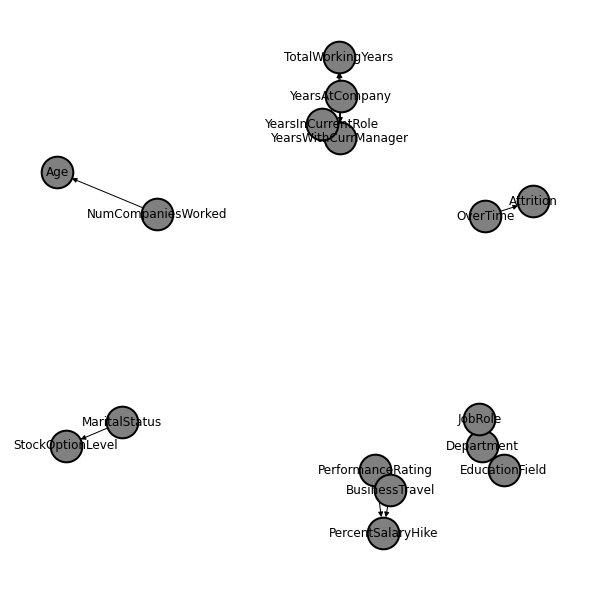

In [5]:

G = nx.MultiDiGraph()

G.add_edges_from(
    estimated_model.edges
)

plt.figure(figsize=(8,8))
nx.draw(G, with_labels = True, node_size=1000, node_color="grey", linewidths=2)
 
ax = plt.gca() # to get the current axis
ax.collections[0].set_edgecolor("#000000") 

### plot with manual layout for publication

('PerformanceRating', 'PercentSalaryHike')
('BusinessTravel', 'PercentSalaryHike')
('OverTime', 'Attrition')
('YearsWithCurrManager', 'TotalWorkingYears')
('Department', 'EducationField')
('NumCompaniesWorked', 'Age')
('JobRole', 'Department')
('YearsAtCompany', 'TotalWorkingYears')
('YearsAtCompany', 'YearsWithCurrManager')
('MaritalStatus', 'StockOptionLevel')
('YearsInCurrentRole', 'YearsAtCompany')


<Axes:>

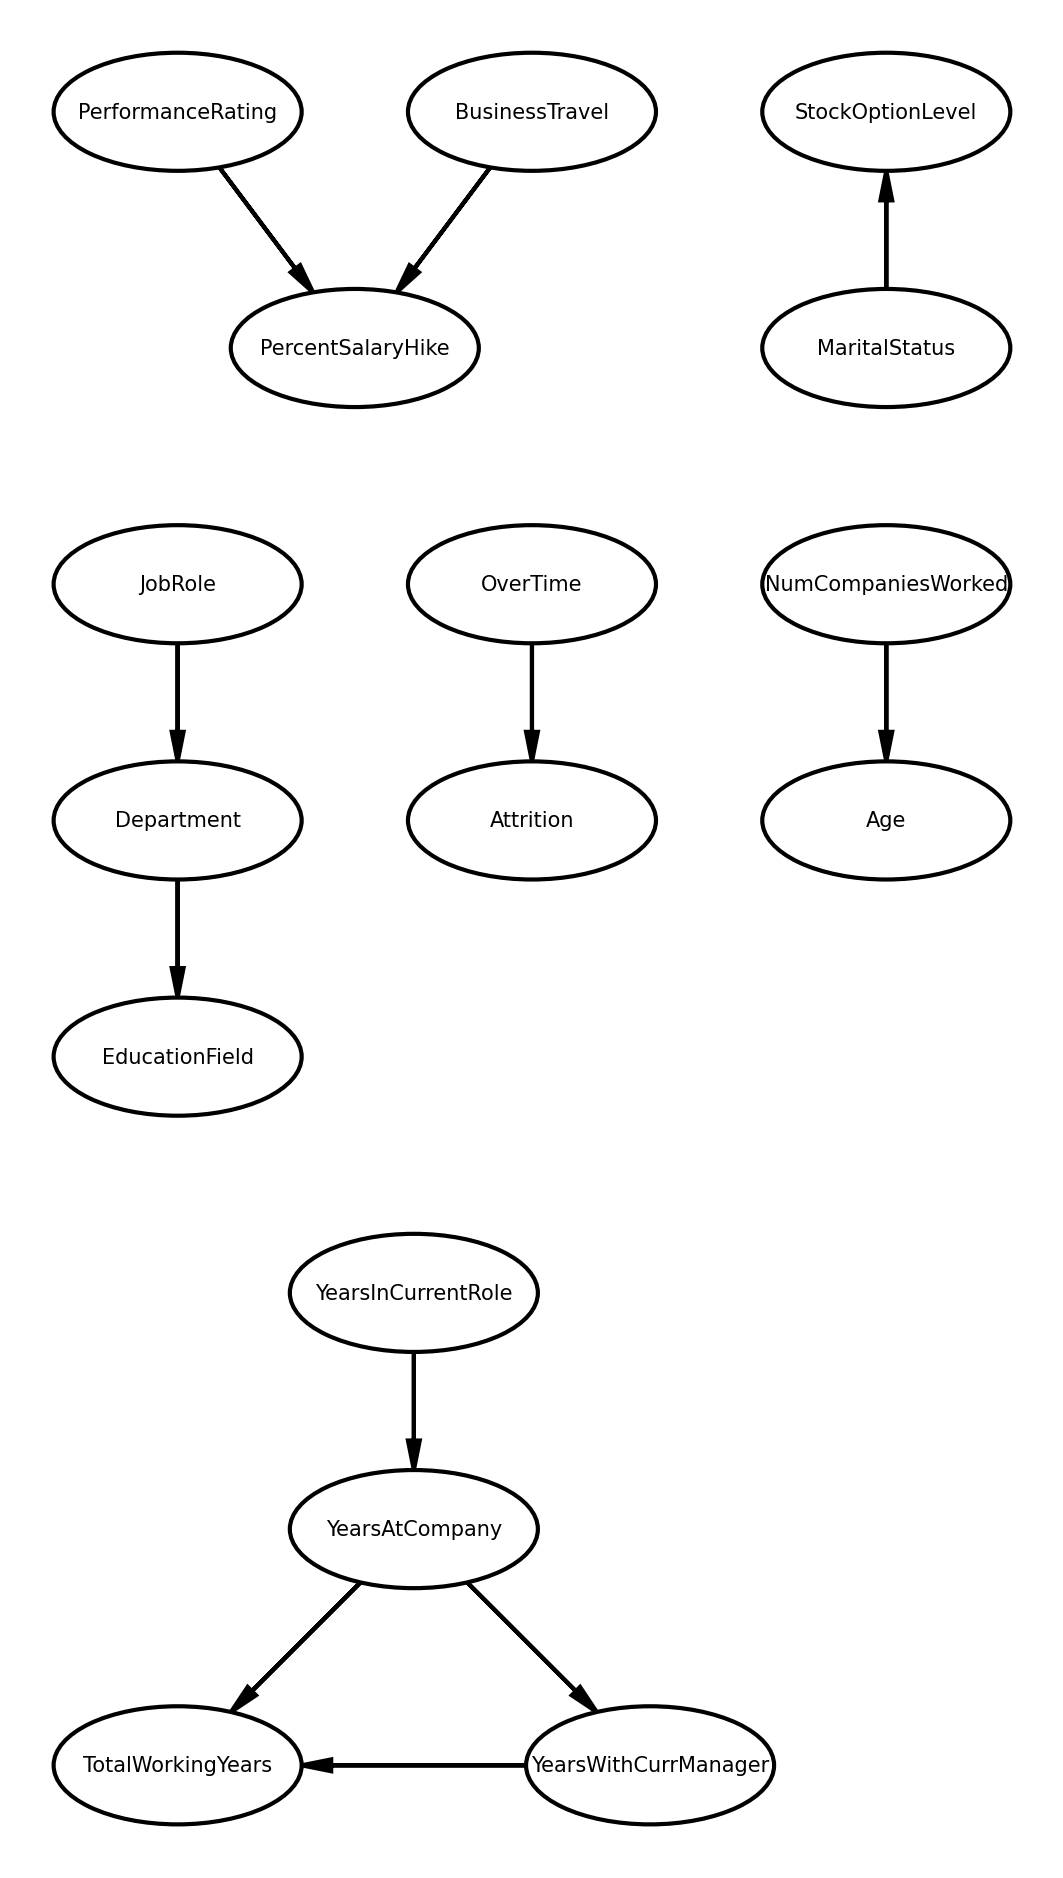

In [6]:

# ff = "comic sans ms"
ff = "impact"
#ff = "times new roman"
plt.rcParams["font.family"] = 'sans-serif'

plt.rcParams["font.size"] =5

pgm = daft.PGM(aspect=2.1, dpi=300)


pgm.add_node("PerformanceRating", r"PerformanceRating",0 ,8)#5.0, 2.0, observed=True)
pgm.add_node("PercentSalaryHike", r"PercentSalaryHike",0.75 ,7)#5.0, 2.0, observed=True)
pgm.add_node("BusinessTravel", r"BusinessTravel",1.5,8)#5.0, 2.0, observed=True)

pgm.add_node("StockOptionLevel", r"StockOptionLevel",3 ,8)#5.0, 2.0, observed=True)
pgm.add_node("MaritalStatus", r"MaritalStatus",3 ,7)#5.0, 2.0, observed=True)


pgm.add_node("JobRole", r"JobRole", 0, 6)# 3.0, 3.0)
pgm.add_node("Department", r"Department", 0, 5)# 3.0, 2.0, observed=True)
pgm.add_node("EducationField", r"EducationField", 0, 4)#, 5.0, 2.0, observed=True)

pgm.add_node("Attrition", r"Attrition",1.5 ,5)#5.0, 2.0, observed=True)
pgm.add_node("OverTime", r"OverTime",1.5 ,6)#5.0, 2.0, observed=True)

pgm.add_node("Age", r"Age",3 ,5)#5.0, 2.0, observed=True)
pgm.add_node("NumCompaniesWorked", r"NumCompaniesWorked",3 ,6)#5.0, 2.0, observed=True)

pgm.add_node("YearsInCurrentRole", r"YearsInCurrentRole",1 ,3)#5.0, 2.0, observed=True)
pgm.add_node("YearsAtCompany", r"YearsAtCompany",1 ,2)#5.0, 2.0, observed=True)
pgm.add_node("YearsWithCurrManager", r"YearsWithCurrManager",2 ,1)#5.0, 2.0, observed=True)
pgm.add_node("TotalWorkingYears", r"TotalWorkingYears",0 ,1)#5.0, 2.0, observed=True)


for edge in estimated_model.edges:
    pgm.add_edge(edge[0], edge[1])
    print(edge)
#pgm.add_edge("ugly", "bad")
#pgm.add_edge("confused", "bad")

pgm.render()